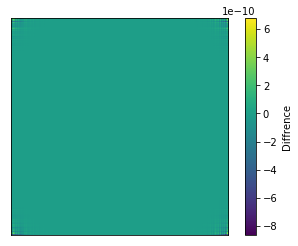

In [37]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#Variables


N = 512
cen = np.floor(N/2.0)
Gscale = 8 / N


#Functions


def gaussianGeneration(A = 1.0, sigmaX = 1.0, sigmaY = 1.0):
    """Generates a 2D gaussian array centred on the centre coords"""
    GaussianA = np.zeros((N,N))
    for x in range(0,N):
        for y in range(0,N):
            GaussianA[x,y] = A * np.exp( - ( ((x - cen)*Gscale)**2/(2*sigmaX**2) + ((y - cen)*Gscale)**2/(2*sigmaY**2) ) )
    return GaussianA

def gaussianGenerationB(A = 1.0, a = N**2/32.0):
    """Generates a 2D gaussian array centred on the centre coords"""
    GaussianB = np.zeros((N,N))
    for x in range(0,N):
        for y in range(0,N):
            GaussianB[x,y] = A * np.exp( - ( (x - cen)**2 + (y - cen)**2)/a )
    return GaussianB


def fourierT(inputA, theta = np.zeros((N,N))):
    return np.fft.fft2(np.fft.fftshift((inputA)))


def thereAndBack(inputA):
    return np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(np.fft.fftshift(inputA))))


G = gaussianGenerationB()
#Graph Plotting
plot = (np.real(thereAndBack(G))-G)/G
plt.figure()
im = plt.imshow( plot, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical', label = "Diffrence")

max is 25732.66564535036
max location is 131328


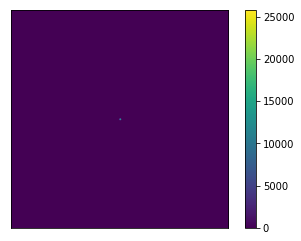

In [38]:
F = fourierT(np.fft.fftshift(G))
X = np.abs(np.fft.ifftshift(np.fft.fft2(G)))
plt.figure()
im = plt.imshow( X, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical')
print("max is " + str(np.amax(X)))
print("max location is " + str(np.argmax(X)))

GET MORE DATA ON THE TRANSFORM LIKE WIDTH AND CHECK VALUE

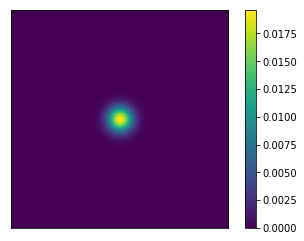

In [39]:
def gaussianGenerationKspace(A = 1.0, a = N**2/32.0):
    """Generates a 2D gaussian array centred on the centre coords"""
    GaussianK = np.zeros((N,N))
    for x in range(0,N):
        for y in range(0,N):
            GaussianK[x,y] = np.sqrt(np.pi/a) * np.exp( - ( (x - cen)**2 + (y - cen)**2 )*np.pi**2/a )
    return GaussianK

plt.figure()
im = plt.imshow( gaussianGenerationKspace(), cmap = cm.viridis,)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical')


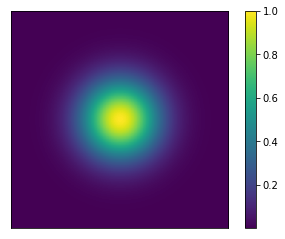

In [40]:
plt.figure()
im = plt.imshow( G, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical')

A

In [7]:
J = np.amax(plot)*100
print("Max percentage error: " + str(J) + " %")

Max percentage error: 5.0729431491499115 %


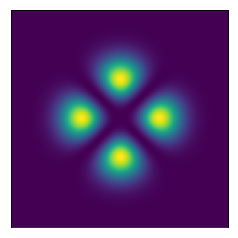

In [8]:
import Laguerre_Gaussian as LG

N = 512

rayleighRangeA = LG.zR(0.13, 500e-9)
spotSizeParamA = LG.wZ(0.13, 10e4, rayleighRangeA)
IntensityA = np.zeros((N,N))
Dist = LG.distances(N, 1/N)
Angl = LG.angles(N)
for i in range(0, N):
    for j in range(0, N):
        IntensityA[i,j] = LG.intensityGenR(Dist[i,j], 10e4, 2, 0, spotSizeParamA, 2*np.pi*np.power(500e-9,-1), rayleighRangeA, Angl[i,j])

plt.figure()
im = plt.imshow( IntensityA, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)

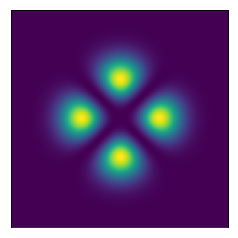

In [9]:
TAB = np.abs(thereAndBack(IntensityA))
plt.figure()
im = plt.imshow( TAB, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)

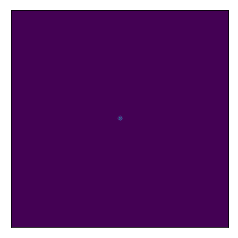

In [10]:

plt.figure()
im = plt.imshow( np.fft.ifftshift(np.abs(fourierT(IntensityA))), cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)

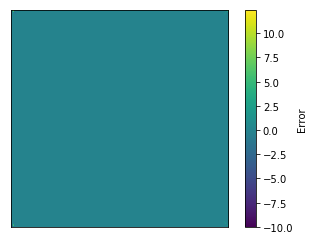

In [11]:
lG = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(IntensityA[i,j] == 0):
            lG[i,j] = 0
        else:
            lG[i,j] = (TAB[i,j] - IntensityA[i,j])/IntensityA[i,j]
lGminus = TAB - IntensityA
plt.figure()
im = plt.imshow( lG*100, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)
plt.colorbar(im, orientation = 'vertical', label = "Error")

In [12]:
J = np.amax(lG[30:482,30:482]*100)
print("Max percentage error: " + str(J) + " %")
#Error is only large towards the edges of the grid

Max percentage error: 0.009808697228266128 %


In [13]:
J = np.amax(lG*100)
print("Max percentage error: " + str(J) + " %")

Max percentage error: 12.428562288612103 %


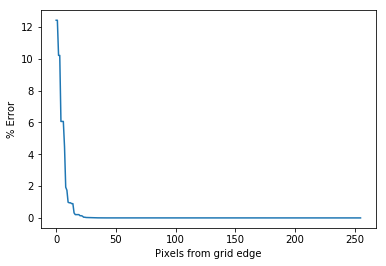

In [14]:
cen = int(np.floor(N/2))
Error = np.zeros(cen)
for i in range(0,cen):
    Error[i] = np.amax(lG[i:N-i,i:N-i])*100
plt.figure()
plt.ylabel("% Error")
plt.xlabel("Pixels from grid edge")
plt.plot(Error)

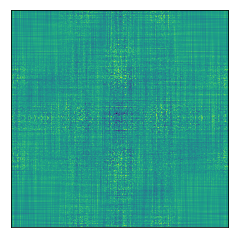

In [15]:
im = plt.imshow( lGminus, cmap = cm.viridis)
im.axes.get_xaxis().set_visible(False)
im.axes.get_yaxis().set_visible(False)